In [10]:
!pip install kagglehub
!pip install pandas

  Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [8]:
import kagglehub

path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")
print("Path to dataset files:", path)

100%|██████████| 3.30M/3.30M [00:01<00:00, 2.83MB/s]

Extracting files...
Path to dataset files: /Users/anc/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2


In [20]:
# load dataset from path
import pandas as pd
import os

folders = os.listdir(path)
df = pd.read_json(path + "/" + folders[1], lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


# clean data
### remove empty strings, null values, and duplicates

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [22]:
df = df.dropna()
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [24]:
df.drop(['article_link'], axis=1, inplace=True)
removed_dups = df.drop_duplicates()
removed_dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28503 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28503 non-null  int64 
 1   headline      28503 non-null  object
dtypes: int64(1), object(1)
memory usage: 668.0+ KB


In [27]:
cleaned_df = removed_dups[(removed_dups['is_sarcastic'] == 1) | (removed_dups['is_sarcastic'] == 0)]
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28503 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28503 non-null  int64 
 1   headline      28503 non-null  object
dtypes: int64(1), object(1)
memory usage: 668.0+ KB


In [36]:
# if data folder does not exist, create it
if not os.path.exists('../data'):
    os.makedirs('../data')
cleaned_df.to_csv('../data/sarcasm_dataset.csv', index=False)

# Visualize data

In [33]:
!pip install seaborn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp39-cp39-macosx_10_9_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp39-cp39-macosx_10_9_universal2.whl (2.8 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_

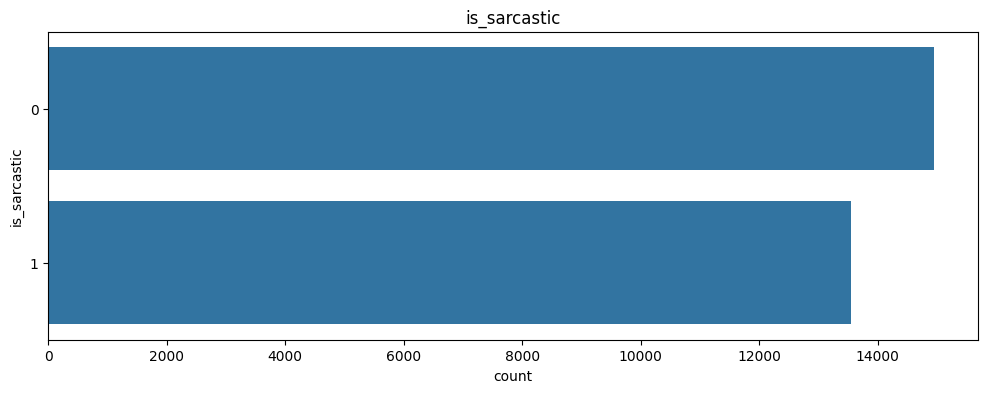

In [39]:
plt.figure(figsize=(12, 4))
sns.countplot(y=cleaned_df['is_sarcastic'])
plt.title('is_sarcastic')
plt.show()

In [40]:
# number of tokens in each headline
cleaned_df['num_tokens'] = cleaned_df['headline'].apply(lambda x: len(x.split()))
cleaned_df.head()


,is_sarcastic,headline,num_tokens
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


<Figure size 1200x600 with 0 Axes>

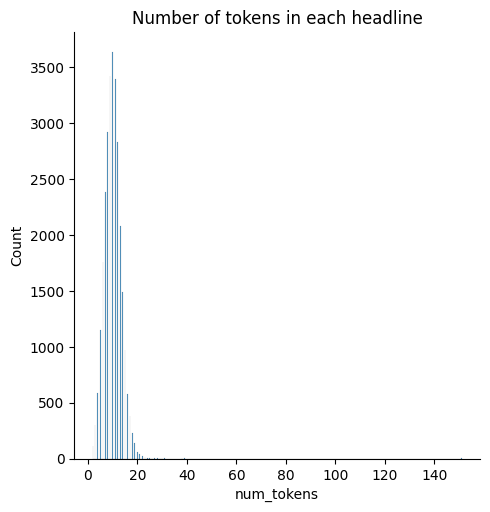

In [42]:
# plot number of tokens in each headline
plt.figure(figsize=(12, 6))
sns.displot(cleaned_df['num_tokens'])
plt.title('Number of tokens in each headline')
plt.show()

In [46]:
print(cleaned_df[cleaned_df['num_tokens'] == 151])
print(cleaned_df[cleaned_df['num_tokens'] == 151]['headline'].values[0])

      is_sarcastic                                           headline  \
7302             1  hot wheels ranked number one toy for rolling d...   

      num_tokens  
7302         151  
hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to 